# Temporal Demand Patterns and Seasonality

To monitor the operational performance of the vehicle fleet in Philadelphia in the year 2016, this notebook will visualize how the fleet usage varies per weekday, per week and during the whole year.


In [28]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from datetime import date
import calendar
#from calendar import day_name

In [29]:
#Import cleaned dataset

trips_df = pd.read_parquet("../../data/bike_trips_cleaned.parquet")

trips_df.head(3)



,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,end_station_name,start_station_name,duration,start_lat,start_lon,end_lat,end_lon,distance,speed,average_time,date_time,max_temp,min_temp,precip
index,,,,,,,,,,,,,,,,,,,,
0,2016-01-01 00:04:00,2016-01-01 00:14:00,3046,3041,3564,Indego30,"Girard Station, MFL",2nd & Market,0 days 00:10:00,39.949895,-75.143749,39.969241,-75.136180,1.005648,6.033888,2016-01-01 00:09:00,2016-01-01,6.7,6.7,0.0
1,2016-01-01 00:07:00,2016-01-01 00:29:00,3028,3019,2629,Indego30,6th & Race,4th & Bainbridge,0 days 00:22:00,39.940735,-75.149370,39.954694,-75.149496,0.397798,1.084905,2016-01-01 00:18:00,2016-01-01,6.7,6.7,0.0
2,2016-01-01 00:14:00,2016-01-01 00:27:00,3007,3066,3430,Indego30,19th & Lombard,"11th & Pine, Kahn Park",0 days 00:13:00,39.945123,-75.159952,39.945664,-75.173272,1.480278,6.832050,2016-01-01 00:20:30,2016-01-01,6.7,6.7,0.0


## Yearly usage per hour

In [30]:
# Convert date_time into a datetime format


# trips_df["date_time"]= pd.to_datetime(trips_df["date_time"],  format="%Y-%m-%d %H:%M:%S")

# print(trips_df["date_time"])


In [31]:
# Copy the dataset and add column with hour of the trip to the copied dataset

trips_df_copy = trips_df
trips_df_copy['hour_trip'] = trips_df['date_time'].dt.hour

trips_df_copy['hour_trip']

index
0          0
1          0
2          0
3          0
4          1
          ..
647052    23
647053    23
647054    23
647055    23
647056    23
Name: hour_trip, Length: 647057, dtype: int64

In [32]:
# Calculate the absolute number of trips for every hour of the year for reference

freq_hour = trips_df['hour_trip'].value_counts()
freq_hour

18    63606
17    61987
19    47448
9     47236
8     44387
16    42334
20    37069
15    35920
14    34887
12    33242
13    32151
10    30207
21    25758
11    23701
22    19484
7     18598
23    14253
0      9229
6      8633
1      6155
2      4059
5      2594
3      2546
4      1573
Name: hour_trip, dtype: int64

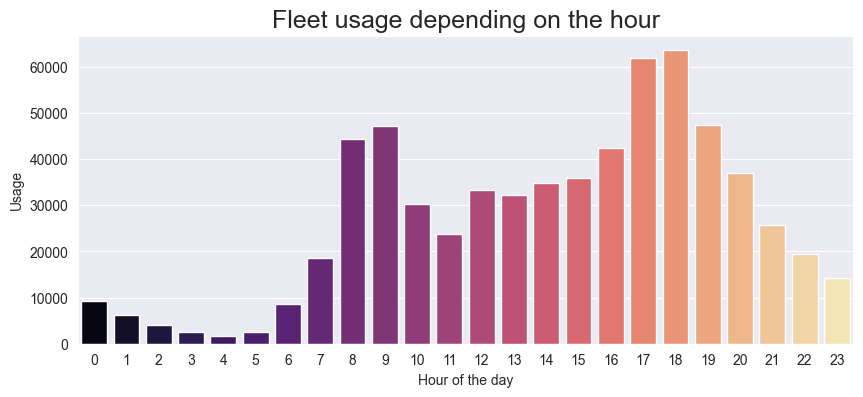

In [33]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.countplot(x=trips_df_copy["hour_trip"], data= trips_df, palette="magma")
ax.set_title("Fleet usage depending on the hour", fontsize=18, fontname="Arial")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Usage")
plt.show()

As seen in the graph, the fleet usage during the night and early hours of the day (0-6am) is relatively low and increases strongly after 7am. During the day, the demand is fairly stable (around 30000 trips) and once again increases strongly after 4pm. After the evening rush hour, the demand slowly falls again towards the end of the day.<p>
One can observe usage peaks from 8-9am and 5-7pm which could point to workers renting bikes to get to work and especially to get back home. 

## Yearly usage per weekday

In [34]:
# Add column with weekdays to dataset

trips_df['weekday'] = trips_df['date_time'].dt.day_name()
trips_df['weekday']


index
0           Friday
1           Friday
2           Friday
3           Friday
4           Friday
            ...   
647052    Saturday
647053    Saturday
647054    Saturday
647055    Saturday
647056    Saturday
Name: weekday, Length: 647057, dtype: object

In [35]:
# Calculate absolute number of trips per weekday for reference

freq_days = trips_df['weekday'].value_counts()
freq_days

Wednesday    101871
Friday        99687
Tuesday       99599
Thursday      99039
Monday        92384
Saturday      80689
Sunday        73788
Name: weekday, dtype: int64

In [36]:
# Sort dataset by weekday to simplify the plotting

trips_df_copy= trips_df

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trips_df_copy['weekday'] = pd.Categorical(trips_df_copy['weekday'], categories=weekdays, ordered=True)
trips_df_copy = trips_df_copy.sort_values('weekday')


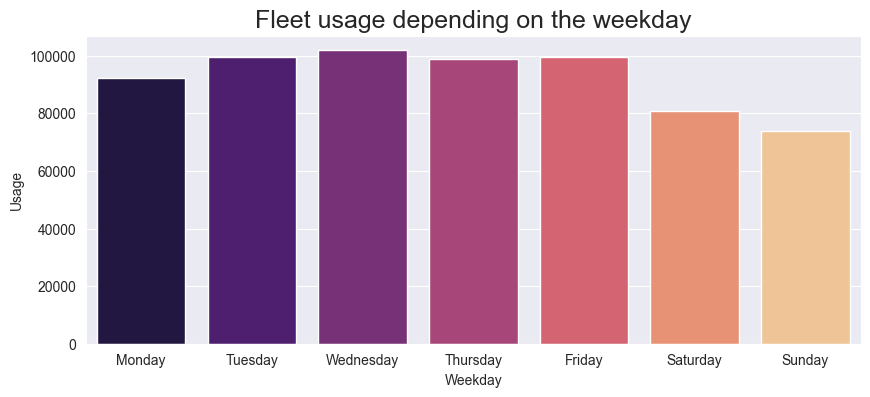

In [37]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.countplot(x=trips_df_copy["weekday"], data= trips_df, palette="magma")
ax.set_title("Fleet usage depending on the weekday", fontsize=18, fontname="Arial")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
plt.show()

Derived from the plot, one can say that the fleet usage during business days is higher than the usage during the weekends. The day with the most bike rentals was Wednesday with 101871 rented bikes, while sundays generally have the lowest number of rentals with 73788 rented bikes in 2016.

## Yearly usage overall

In [38]:
# Add column with months to dataset

trips_df['month'] = trips_df['date_time'].dt.month_name()
trips_df['month']


index
0          January
1          January
2          January
3          January
4          January
            ...   
647052    December
647053    December
647054    December
647055    December
647056    December
Name: month, Length: 647057, dtype: object

In [39]:
# Calculate absolute number of trips per month for reference

freq_month = trips_df['month'].value_counts()
freq_month

September    79086
August       77225
July         75791
October      71943
June         71763
November     67996
May          55116
April        42038
March        35779
December     33662
February     19077
January      17581
Name: month, dtype: int64

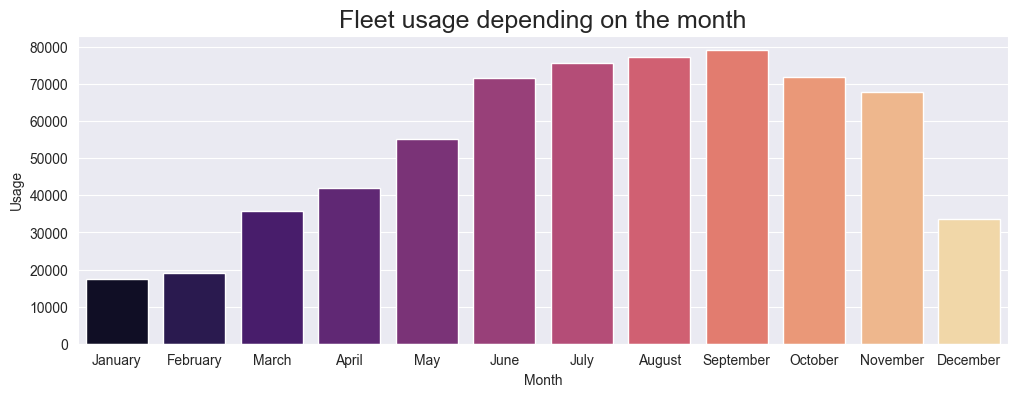

In [40]:
fig,ax = plt.subplots(figsize=(12,4)) 

sns.countplot(x=trips_df["month"], data= trips_df, palette="magma")
ax.set_title("Fleet usage depending on the month", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
plt.show()

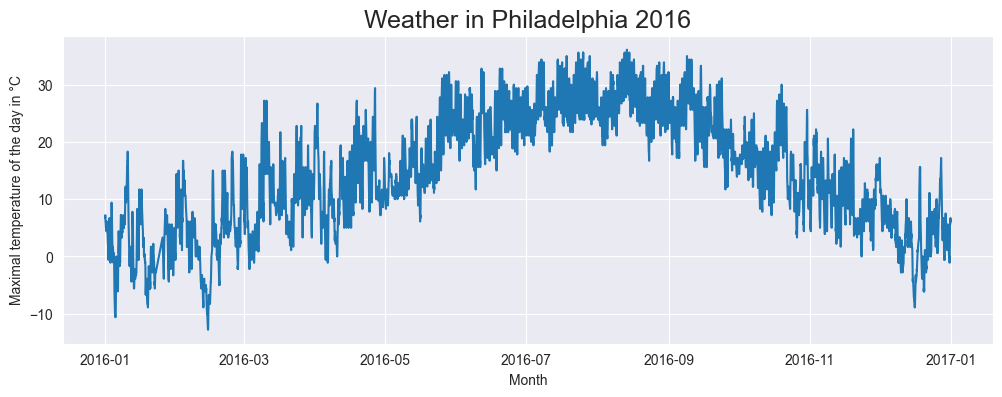

In [41]:
# Plotting the weather in Philadelphia in 2016

plt.subplots(figsize=(12, 4))
plt.grid(True)
plt.plot(trips_df["date_time"],trips_df["max_temp"])
plt.xlabel("Month")
plt.ylabel("Maximal temperature of the day in °C")
plt.title("Weather in Philadelphia 2016", fontsize=18, fontname="Arial")

plt.show()

Looking at the plots showing the fleet usage and the weather in Philadelphia in 2016, one can infer that the demand rises with the temperature and peaks from July to September when the temperature ranges between 20 and 30°C. <p>
June, as well as October and November, also show high bike rental numbers and warm temperatures. March to April shows a rising demand in bike rentals, beginning when the temperature starts to rise over 0°C permanently. <p> Meanwhile, the demand during the winter months (December-February) is lower when the temperature starts falling under 0°C.
